In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
data = pd.read_csv('pimaIndiansDiabetes.csv')
data[data.columns[[0,1,2]]].head()

,6,148,72
0,1,85,66
1,8,183,64
2,1,89,66
3,0,137,40
4,5,116,74


In [85]:
#SCA

import random
import math
a = 1
Tmax = 6
subsets = []
totalFeatures = len(data.columns[:-1])
X = random.sample(range(1,totalFeatures),3)  
P = 100
t = 0
while t<Tmax :
    X = random.sample(range(1,totalFeatures),3)
    subsets = []
    subsets.append(X) 
    t += 1
    
#Function for checking the new generated subset tempSet is already present in the already initialized subsets or not
def isRepeat(subsets, tempSet):
    print(subsets)
    print(tempSet)
    for subset in subsets:
        valueSet = set()
        for feature in subset:
            valueSet.add(feature)
    for feature in tempSet:
        if((feature in valueSet) == False):
            return False
        
        
def randomSearchAgents(m, n):
    i = 1
    while i<m:
        X = random.sample(range(1,totalFeatures),n)
        if (isRepeat(subsets, X) == False):
            subsets.append(X)
            i += 1
print(subsets)

[[7, 2, 1]]


In [86]:
randomSearchAgents(6, 3)

[[7, 2, 1]]
[2, 5, 4]
[[7, 2, 1], [2, 5, 4]]
[5, 2, 7]
[[7, 2, 1], [2, 5, 4], [5, 2, 7]]
[1, 7, 2]
[[7, 2, 1], [2, 5, 4], [5, 2, 7], [1, 7, 2]]
[4, 1, 7]
[[7, 2, 1], [2, 5, 4], [5, 2, 7], [1, 7, 2], [4, 1, 7]]
[3, 2, 5]


In [71]:
#FOR CHECKING THE SCORE FOR EACH SELECTED FEATURE SUBSET
scores = []
def trainTestScore(X, y):
    X.head()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
    errorRate = []
    knn = KNeighborsClassifier(n_neighbors = 19)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    scores.append(np.mean(prediction != y_test))
        

In [72]:
for subset in subsets:
    print(subset)
    trainTestScore(data.iloc[:,subset], data['1'])

[3, 4, 6]
[7, 3, 2]
[6, 2, 3]
[6, 4, 3]
[7, 2, 1]
[2, 6, 4]


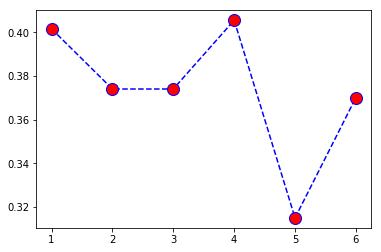

In [75]:
plt.plot(range(1,len(subsets)+1), scores, color='blue', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=12)

In [78]:
#FOR CHECKING THE SCORE FOR EACH SELECTED FEATURE SUBSET
errorRate = []
def trainTestScore(X, y):
    X.head()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
    errorRate = []
    knn = KNeighborsClassifier(n_neighbors = 19)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    error = np.mean(prediction != y_test)
    errorRate.append(error)
    return error

In [77]:
import random
import math


#SCA IMPLEMENTATION
#begin
#Randomly initialization of each search agents in the population X(t = 1,2,...,m)
a = 1
totalFeatures = len(data.columns[:-1])
r1 = a
t = 0
subsets = []
lowestError = 100 #initializing as highest errorRate for comparison purpose

#Function for checking the new generated subset tempSet is already present in the already initialized subsets or not
def isRepeat(subsets, tempSet):
    print(subsets)
    print(tempSet)
    for subset in subsets:
        valueSet = set()
        for feature in subset:
            valueSet.add(feature)
    for feature in tempSet:
        if((feature in valueSet) == False):
            return False
        
        
def randomSearchAgents(m, n):
    i = 1
    while i<m:
        X = random.sample(range(1,totalFeatures),n)
        if (isRepeat(subsets, X) == False):
            subsets.append(X)
            i += 1
            
#EQUATION 1
def updateUsingSineCosine(X):
    featureSubset = []
    for j in range(len(X)):
        #print(X[j])
        if(s%2 == 0):
            feature = int(X[j] + r1*r2*abs(r3*P[j]-X[j]))
        else:
            feature = int(X[j] + r1*r2*abs(r3*P[j]-X[j]))
        feature %= totalFeatures
        featureSubset.append(feature)
    return featureSubset

#here subsets list contains the list of randomly initialized search agent indices

#INITIALIZE the max numbers of iteration Tmax
Tmax = 6
P = []

while t<Tmax:
    #foreach search agent Xi in the population do
    
    for subset in subsets:
        print(subset)
        #Evaluate Xi via the fitness function. if f(Xi)
        error = trainTestScore(data.iloc[:,subset], data['1'])
        #if f(Xi) better than f(P) then
        #Set P = Xi;
        if (error < lowestError):
            P = subset
    
    #Update r1 using equation 2
    
    r1 = a - t*(a/Tmax)#equation 2
    
    #Generate randomly new values for r2, r3 and s.
    
    s = int(round(random.random(),1)*10)
    r2 = random.uniform(0.1, 1.0)
    r3 = random.uniform(0.1,2.0)
    #foreach search agent Xi in the population do
    #Update Xi using equation 1.
    for i in range(len(subsets)):
        subsets[i] = updateUsingSineCosine(subsets[i])
    print(P)
#Return P best solution obtained so far.
print("best solution: ",P)

,72,0.627,0
0,66,0.351,0
1,64,0.672,0
2,66,0.167,94
3,40,2.288,168
4,74,0.201,0


In [ ]:
def updateUsingSineCosine(X):
    featureSubset = []
    for j in range(len(X)):
        #print(X[j])
        if(s%2 == 0):
            feature = int(X[j] + r1*r2*abs(r3*P[j]-X[j]))
        else:
            feature = int(X[j] + r1*r2*abs(r3*P[j]-X[j]))
        feature %= totalFeatures
        featureSubset.append(feature)
    return featureSubset